In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Vanke HK Equity (1).xlsx to Vanke HK Equity (1).xlsx


In [ ]:
# Specify the filename of the uploaded Excel file
excel_filename = 'Vanke HK Equity (1).xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(excel_filename)


In [ ]:
# Check column names
print(df.columns)

Index(['Time', 'Stock Prices'], dtype='object')


In [ ]:
# Normalize the values to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
df['Stock Prices'] = scaler.fit_transform(df['Stock Prices'].values.reshape(-1, 1))

In [ ]:
# Split the data into training and test sets
train_size = int(len(df) * 0.64)
val_size = int(len(df) * 0.16)
test_size = len(df) - train_size - val_size
train_data = df[:train_size]['Stock Prices'].values
val_data = df[train_size:train_size+val_size]['Stock Prices'].values
test_data = df[train_size:]['Stock Prices'].values

In [ ]:
# Reshape the input data
train_data = train_data.reshape(-1, 1, 1)
val_data = val_data.reshape(-1, 1, 1)
test_data = test_data.reshape(-1, 1, 1)

Epoch 1/50
92/92 [==============================] - 6s 17ms/step - loss: 0.1212 - val_loss: 0.0853
Epoch 2/50
92/92 [==============================] - 1s 9ms/step - loss: 0.0621 - val_loss: 0.0449
Epoch 3/50
92/92 [==============================] - 1s 10ms/step - loss: 0.0519 - val_loss: 0.0393
Epoch 4/50
92/92 [==============================] - 1s 9ms/step - loss: 0.0420 - val_loss: 0.0267
Epoch 5/50
92/92 [==============================] - 1s 10ms/step - loss: 0.0365 - val_loss: 0.0230
Epoch 6/50
92/92 [==============================] - 1s 8ms/step - loss: 0.0298 - val_loss: 0.0142
Epoch 7/50
92/92 [==============================] - 1s 6ms/step - loss: 0.0262 - val_loss: 0.0098
Epoch 8/50
92/92 [==============================] - 1s 7ms/step - loss: 0.0229 - val_loss: 0.0079
Epoch 9/50
92/92 [==============================] - 1s 7ms/step - loss: 0.0224 - val_loss: 0.0067
Epoch 10/50
92/92 [==============================] - 1s 7ms/step - loss: 0.0207 - val_loss: 0.0061
Epoch 11/50
92/9

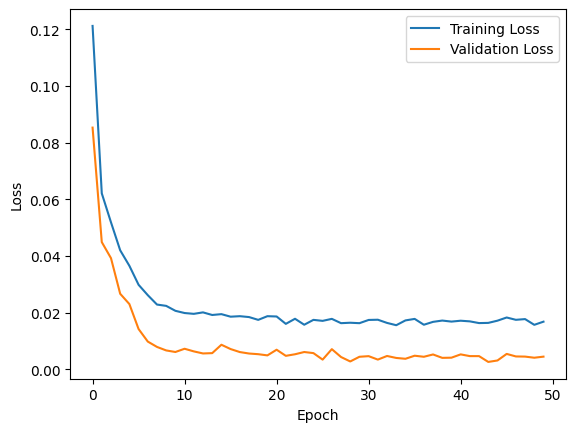

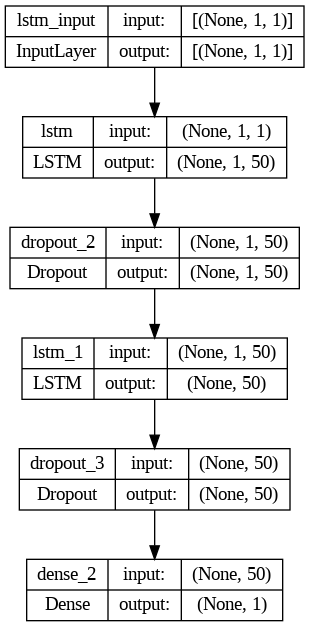

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
# Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.9))

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(1, 1)),
    tf.keras.layers.Dropout(0.9),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dropout(0.9),
    tf.keras.layers.Dense(units=1)
])
# Compile the model
model.compile(optimizer='adam', loss='mse')
model.compile
# Train the model
history = model.fit(
    train_data[:-1], train_data[1:],
    epochs=50, batch_size=16, verbose=1,
    validation_data=(val_data[:-1], val_data[1:])
)
# Plot the loss history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw the neural network diagram
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [ ]:
model.fit

<bound method Model.fit of <keras.src.engine.sequential.Sequential object at 0x7989d5e31120>>

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 dropout_2 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Perform prediction on the test data
predictions = model.predict(test_data)

# Convert the predicted values to their original scale using the scaler
predicted_values = scaler.inverse_transform(predictions.reshape(-1, 1))

# Convert the actual test data to their original scale using the scaler
actual_values = scaler.inverse_transform(test_data.reshape(-1, 1))

# Calculate accuracy (e.g., using mean squared error)
mse = np.mean((actual_values - predicted_values) ** 2)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")

26/26 [==============================] - 2s 6ms/step
Root Mean Squared Error (RMSE) on Test Data: 1.3685109077488955


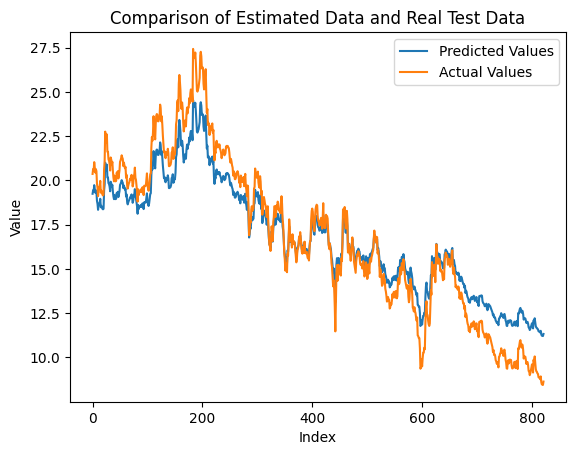

In [ ]:
import matplotlib.pyplot as plt

# Convert the predicted values and actual values to a 1D array
predicted_values = predicted_values.flatten()
actual_values = actual_values.flatten()

# Create a range of indices for the x-axis
indices = np.arange(len(predicted_values))

# Plot the predicted values and actual values
plt.plot(indices, predicted_values, label='Predicted Values')
plt.plot(indices, actual_values, label='Actual Values')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Estimated Data and Real Test Data')

# Add legend
plt.legend()

# Display the plot
plt.show()